In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pip install plotly

import glob
f = glob.glob("*.xlsx")

import glob
excel_files = glob.glob('C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/EUR JPY/Data/*.xlsx') # assume the path

#C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/Data EURUSD
for excel in excel_files:
    out = excel.split('.')[0]+'.csv'
    df = pd.read_excel(excel) # if only the first sheet is needed.
    df.to_csv(out) 

In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD XAU/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    #df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [3]:
data.head(12)

,Index,Timestamp,Open_Bid_Quote,High_Bid_Quote,Low_Bid_Quote,Close_Bid_Quote,Volume
0,0,2010-01-03 18:01:00,1098.10,1099.55,1098.05,1099.55,0
1,1,2010-01-03 18:02:00,1099.60,1099.80,1099.05,1099.20,0
2,2,2010-01-03 18:03:00,1099.20,1099.75,1099.20,1099.70,0
3,3,2010-01-03 18:04:00,1099.80,1100.00,1099.65,1099.95,0
4,4,2010-01-03 18:05:00,1100.00,1100.30,1100.00,1100.05,0
5,5,2010-01-03 18:06:00,1100.05,1100.10,1099.65,1099.85,0
6,6,2010-01-03 18:07:00,1099.80,1099.80,1099.45,1099.55,0
7,7,2010-01-03 18:08:00,1099.55,1099.90,1099.55,1099.80,0
8,8,2010-01-03 18:09:00,1099.80,1099.85,1099.75,1099.75,0
9,9,2010-01-03 18:10:00,1099.70,1099.75,1099.65,1099.65,0


In [4]:
data['Timestamp'].min()

'2010-01-03 18:01:00'

In [5]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [6]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [7]:
data = data.resample("D").max()

In [8]:
data.columns

Index(['Index', 'Open_Bid_Quote', 'High_Bid_Quote', 'Low_Bid_Quote',
       'Close_Bid_Quote', 'Volume'],
      dtype='object')

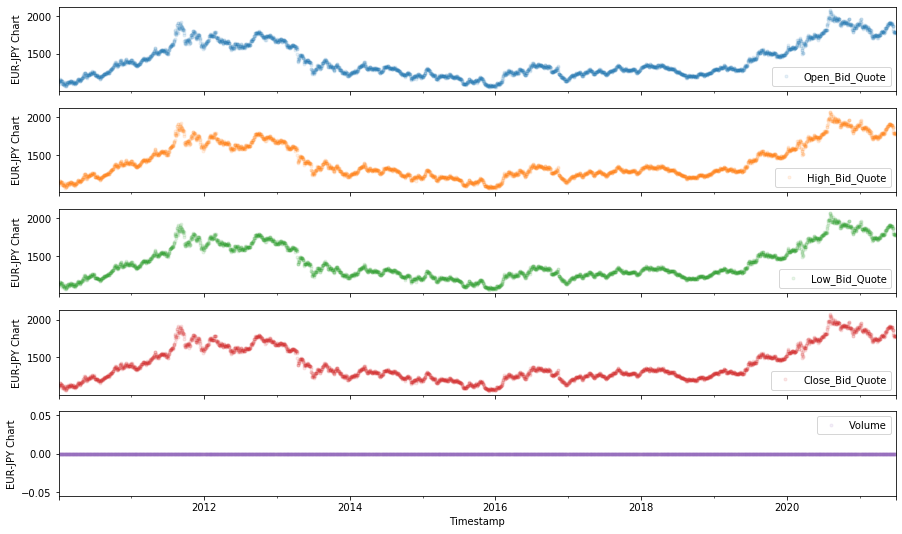

In [9]:
cols_plot = ['Open_Bid_Quote', 'High_Bid_Quote', 'Low_Bid_Quote','Close_Bid_Quote','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.1, linestyle='None', figsize=(15, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('EUR-JPY Chart')

Text(0, 0.5, 'EUR-JPY Chart - 2019')

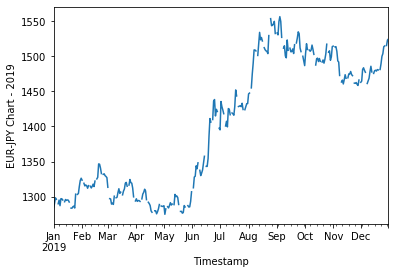

In [10]:
ax = data.loc['2019', 'Close_Bid_Quote'].plot()
ax.set_ylabel('EUR-JPY Chart - 2019')

Text(0, 0.5, 'EUR-JPY Chart - 2019July-2019Sep')

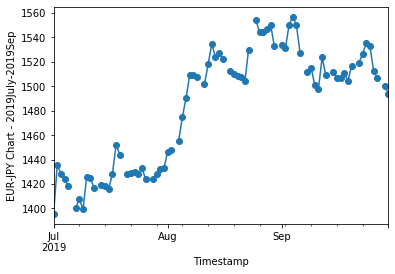

In [11]:
ax = data.loc['2019-07':'2019-09', 'Close_Bid_Quote'].plot(marker='o', linestyle='-')
ax.set_ylabel('EUR-JPY Chart - 2019July-2019Sep')

In [12]:
data.isnull().sum()/len(data)*100

Index              14.772457
Open_Bid_Quote     14.772457
High_Bid_Quote     14.772457
Low_Bid_Quote      14.772457
Close_Bid_Quote    14.772457
Volume             14.772457
dtype: float64

In [13]:
int(len(data['Close_Bid_Quote']))

4197

In [14]:
data[data['Close_Bid_Quote'].isnull()]

,Index,Open_Bid_Quote,High_Bid_Quote,Low_Bid_Quote,Close_Bid_Quote,Volume
Timestamp,,,,,,
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-16,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-23,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-29,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-12,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)

import mplfinance as fplt

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Timestamp'],
                close=data['Close_Bid_Quote'])])

fig.show()


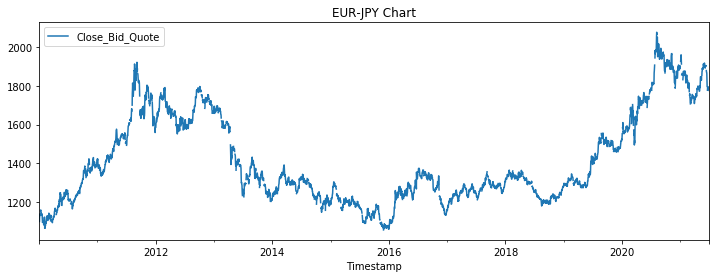

In [16]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart')
plt.show(block=False)

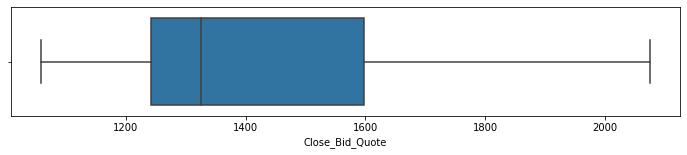

In [17]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Close_Bid_Quote'],whis=1.5)

In [18]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

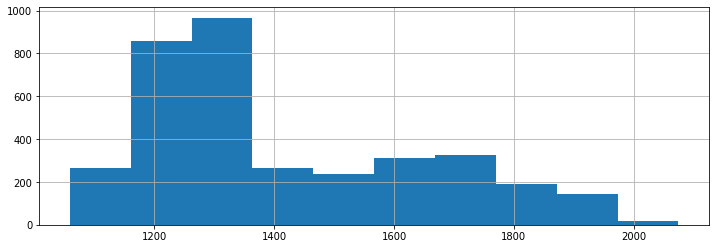

In [19]:
fig = data.Close_Bid_Quote.hist(figsize = (12,4))

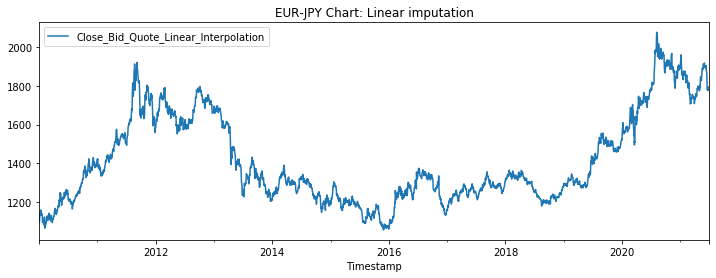

In [20]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart: Linear imputation')
plt.show(block=False)

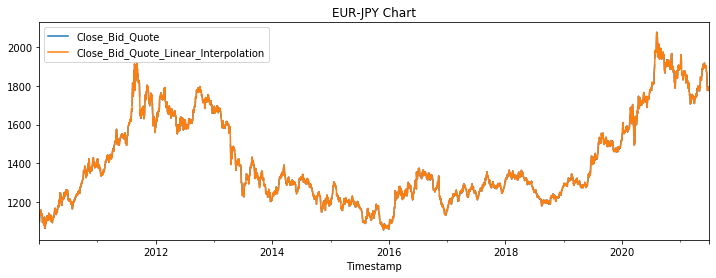

In [21]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart')
plt.show(block=False)

In [22]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [23]:
data

,Close_Bid_Quote_Linear_Interpolation
Timestamp,
2010-01-03,1102.030
2010-01-04,1123.700
2010-01-05,1127.780
2010-01-06,1140.100
2010-01-07,1135.080
...,...
2021-06-26,1786.258
2021-06-27,1782.698
2021-06-28,1785.608


In [24]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

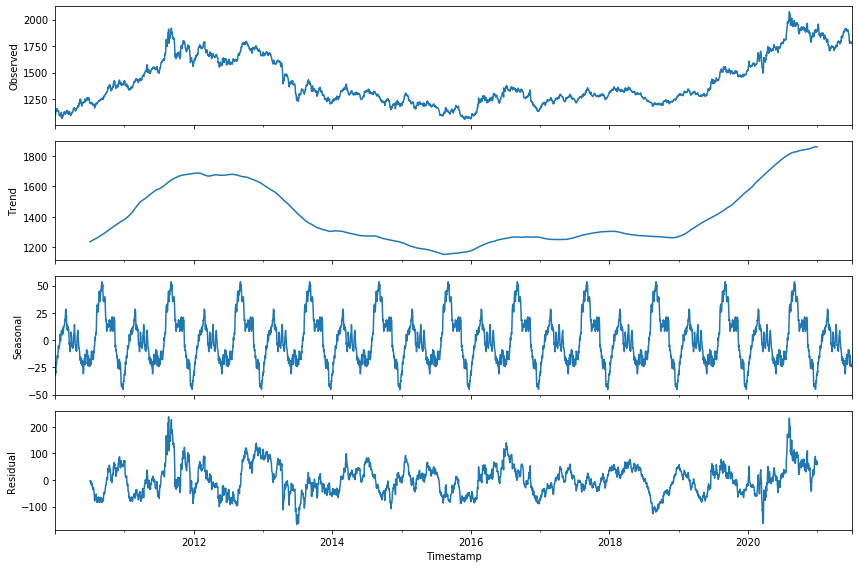

In [25]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Close_Bid_Quote, model='additive',freq=365) # additive seasonal index
fig = decomposition.plot()
plt.show()

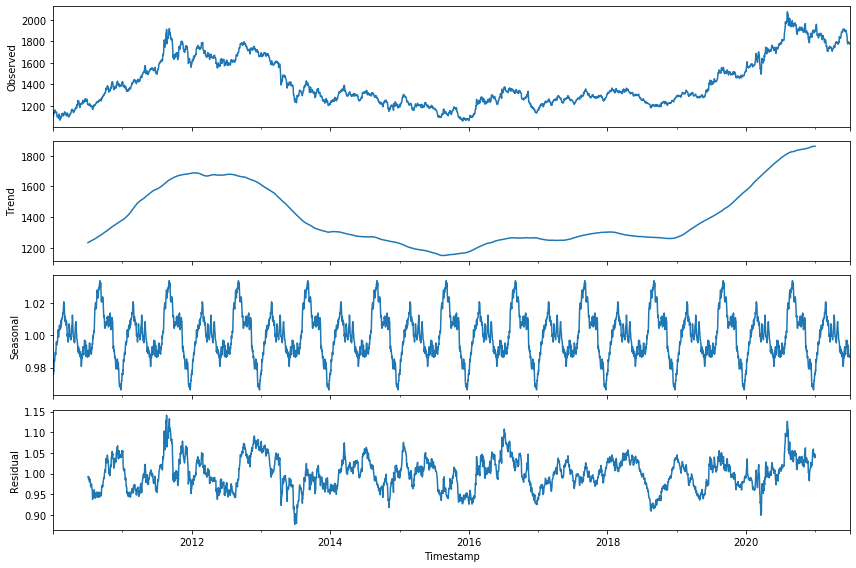

In [26]:
decomposition = sm.tsa.seasonal_decompose(data.Close_Bid_Quote, model='multiplicative',freq=365) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

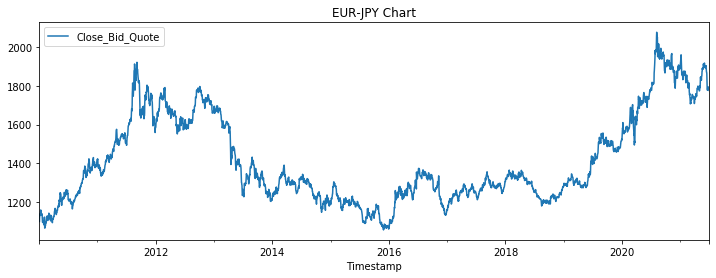

In [27]:
data['Close_Bid_Quote'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart')
plt.show(block=False)

In [28]:
int(len(data['Close_Bid_Quote'])*80/100)

3357

In [29]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [30]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Close_Bid_Quote'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.511909
Critical Values @ 0.05: -2.86
p-value: 0.527612


In [31]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Close_Bid_Quote'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.923522
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


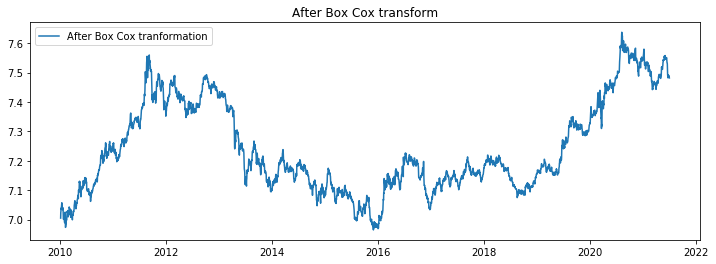

In [32]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Close_Bid_Quote'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

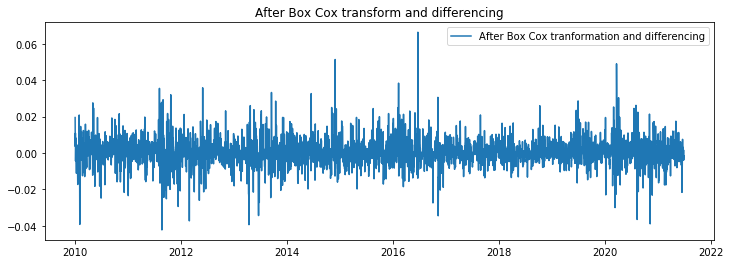

In [33]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [34]:
data_boxcox_diff.dropna(inplace=True)

In [35]:
data_boxcox_diff.tail()

Timestamp
2021-06-26   -0.001991
2021-06-27   -0.001995
2021-06-28    0.001631
2021-06-29   -0.003872
2021-06-30   -0.001615
Freq: D, dtype: float64

In [36]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -12.236382
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [37]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135200
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


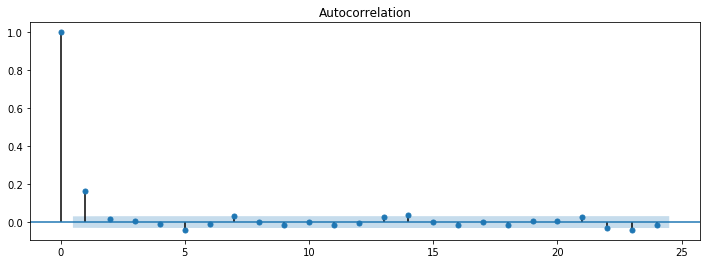

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 24)
plt.show()

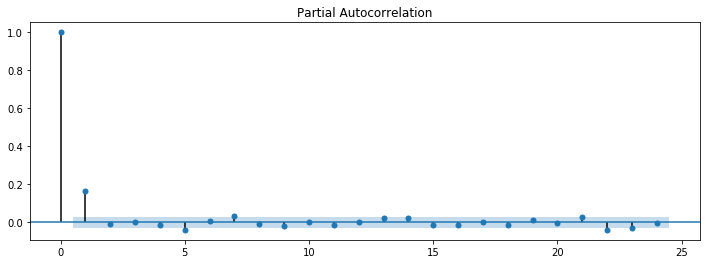

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 24)
plt.show()

In [40]:
resDiff = sm.tsa.arma_order_select_ic(train, max_ar=3, max_ma=3, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(p,q) = (3, 3) is the best.


In [41]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [42]:
train_data_boxcox_diff

Timestamp
2010-01-04    0.019473
2010-01-05    0.003624
2010-01-06    0.010865
2010-01-07   -0.004413
2010-01-08    0.003448
                ...   
2019-03-09   -0.000870
2019-03-10   -0.000871
2019-03-11    0.000554
2019-03-12    0.005178
2019-03-13    0.004173
Freq: D, Length: 3356, dtype: float64

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
model = ARIMA(train_data_boxcox, order=(3, 1, 3))
model_fit = model.fit()
print(model_fit.params)

const        0.000053
ar.L1.D.y   -0.049684
ar.L2.D.y    0.274357
ar.L3.D.y   -0.091517
ma.L1.D.y    0.205077
ma.L2.D.y   -0.249707
ma.L3.D.y    0.035399
dtype: float64


In [45]:
y_hat_arima = data_boxcox_diff.copy()

In [46]:
data_boxcox_diff.index.min()

Timestamp('2010-01-04 00:00:00', freq='D')

In [47]:
data_boxcox_diff.index.max()

Timestamp('2021-06-30 00:00:00', freq='D')

In [48]:
data_boxcox_diff

Timestamp
2010-01-04    0.019473
2010-01-05    0.003624
2010-01-06    0.010865
2010-01-07   -0.004413
2010-01-08    0.003448
                ...   
2021-06-26   -0.001991
2021-06-27   -0.001995
2021-06-28    0.001631
2021-06-29   -0.003872
2021-06-30   -0.001615
Freq: D, Length: 4196, dtype: float64

In [49]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

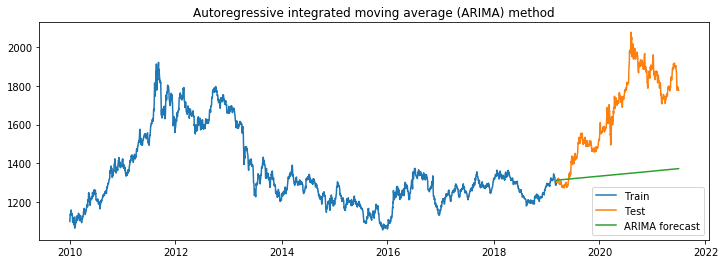

In [50]:
plt.figure(figsize=(12,4))
plt.plot(train['Close_Bid_Quote'], label='Train')
plt.plot(test['Close_Bid_Quote'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [51]:
test.index.min()

Timestamp('2019-03-14 00:00:00', freq='D')

In [52]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close_Bid_Quote'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Close_Bid_Quote']-y_hat_arima['arima_forecast'][test.index.min():])/test['Close_Bid_Quote'])*100,2)

results =pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,375.38,18.37


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12),freq='D',initialization='approximate_diffuse') 
model_fit = model.fit()
print(model_fit.params)

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ar.L1       0.087332
ar.L2       0.030524
ar.L3      -0.010807
ma.L1       0.082605
ma.L2      -0.019054
ma.L3      -0.000472
ar.S.L12    0.001277
ma.S.L12   -0.885268
sigma2      0.000050
dtype: float64


In [54]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

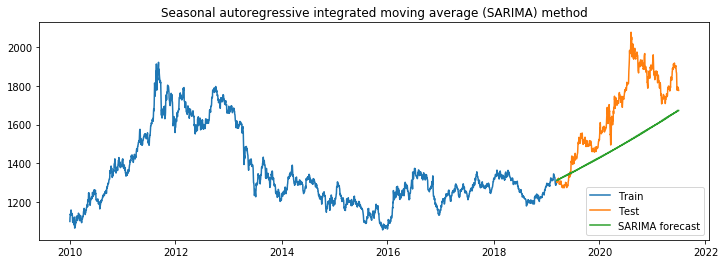

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['Close_Bid_Quote'], label='Train')
plt.plot(test['Close_Bid_Quote'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(test['Close_Bid_Quote'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Close_Bid_Quote']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Close_Bid_Quote'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,375.38,18.37
0,Seasonal autoregressive integrated moving aver...,220.95,10.47


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12), exog=train,initialization='approximate_diffuse') 
model_fit = model.fit()
print(model_fit.params)

Close_Bid_Quote    0.000706
ar.L1             -0.354751
ar.L2             -0.457496
ar.L3              0.187776
ma.L1              0.495641
ma.L2              0.465107
ma.L3             -0.171912
ar.S.L12          -0.118058
ma.S.L12          -0.622253
sigma2             0.000001
dtype: float64


In [58]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

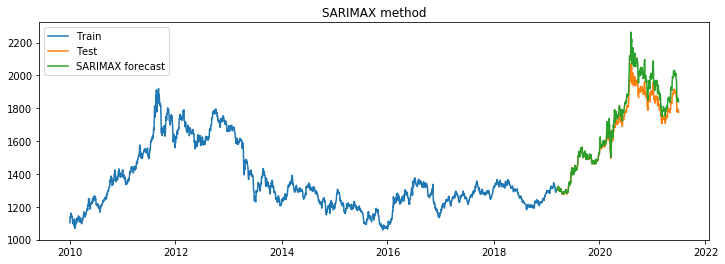

In [59]:
plt.figure(figsize=(12,4))
plt.plot(train['Close_Bid_Quote'], label='Train')
plt.plot(test['Close_Bid_Quote'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test['Close_Bid_Quote'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Close_Bid_Quote']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Close_Bid_Quote'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,375.38,18.37
0,Seasonal autoregressive integrated moving aver...,220.95,10.47
0,SARIMAX method,65.07,2.53
